# Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Visadataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

## Data Cleaning

* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset

### Check Null Values


In [3]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no null values

In [4]:
df.duplicated().sum()

0

* Remove case_id from the dataset as it cannot used in Model Training

In [5]:
df.drop('case_id',inplace=True,axis=1)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Feature Engineering

In [7]:
# import date class from datetime module
from datetime import date

# creating the date object of today's date
todays_date = date.today()
current_year = todays_date.year

In [8]:
current_year

2025

**Subtract current year with year of estab to get company's age**

In [9]:
df['company_age'] = current_year - df['yr_of_estab']

In [10]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [11]:
df.drop('yr_of_estab',inplace=True,axis=1)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


## Type of Features

In [12]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [13]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
cat_features

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

# Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**

In [14]:
X = df.drop('case_status',axis=1)
y = df['case_status']

In [15]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

#### Manual encoding target column

In [16]:
# If the target column has Denied it is encoded as 1 others as 0
y = np.where(y=='Denied',1,0)

In [17]:
y

array([1, 0, 1, ..., 0, 0, 0])

# Feature Transformation

In [18]:
# checking Distribution of data, before scaling

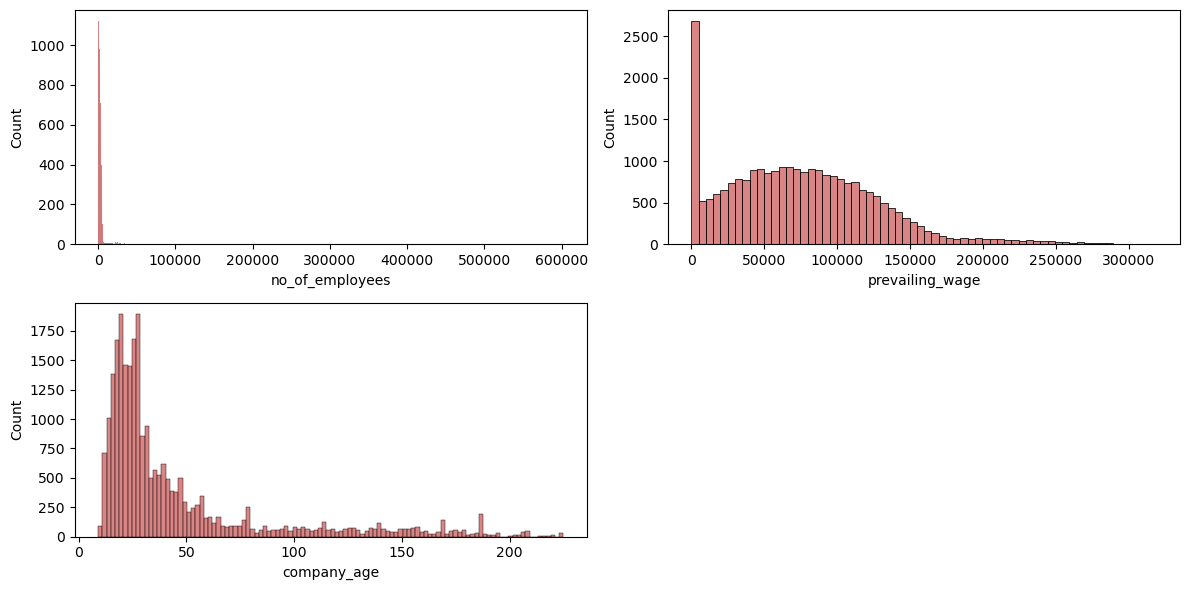

In [19]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* No of employees and company age column is skewed.
* Apply a power transform feature wise to make data more Gaussian-like.

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell
curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.
A normal distribution has a skew of zero

In [20]:
# Check skewness
X[num_features].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

# Apply Power Transformer to Check if it can reduces the outliers

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [22]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)
X_copy.head()

,company_age,no_of_employees
0,-0.955551,1.517300
1,-0.467001,0.030912
2,-1.078363,2.885076
3,1.630914,-1.343550
4,-0.738126,-0.432287


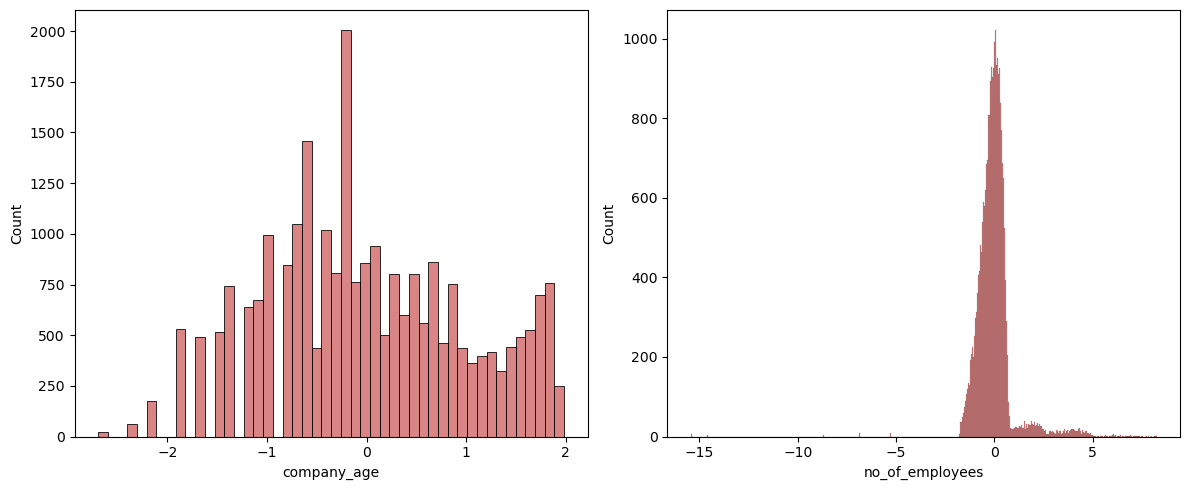

In [23]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

### Checking Skewness

In [24]:
X_copy.skew(axis=0,skipna=True)

company_age        0.112260
no_of_employees    0.399339
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [24]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


# Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

### Selecting number features for preprocessing

In [25]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [26]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

# Preprocessing using Column Transformer

In [27]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [28]:
X = preprocessor.fit_transform(X)

In [29]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

# Classification

In [30]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [31]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13629, 24), (3408, 24))

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [33]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [34]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [35]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [36]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9489
- F1 score: 0.9529
- Precision: 0.9488
- Recall: 0.9571
- Roc Auc Score: 0.9482


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9246
- F1 score: 0.9307
- Precision: 0.9235
- Recall: 0.9380
- Roc Auc Score: 0.9234


Logistic Regression
Model performance for Training set
- Accuracy: 0.7382
- F1 score: 0.7523
- Precision: 0.7677
- Recall: 0.7374
- Roc Auc Score: 0.7383
----------------------------------
Model performance for Test set
- Accuracy: 0.7256
- F1 score: 0.7411
- Precision: 0.7555
- Recall: 0.7272
- Roc Auc Score: 0.7255


XGBClassifier
Model performance for Training set


### Results of All Models

In [37]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.948944
3,XGBClassifier,0.935153
1,Decision Tree,0.924589
4,AdaBoost Classifier,0.845951
2,Logistic Regression,0.725646


# Hyperparameter Tunning

In [38]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,12,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 150]
}


In [39]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params)
]

In [40]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_
 
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 11}
---------------- Best Params for RF -------------------
{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': None}


In [41]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 11},
 'RF': {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': None}}

# Re-training the Model with best Parameters 

In [42]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9531
- F1 score: 0.9568
- Precision: 0.9511
- Recall: 0.9625
- Roc Auc Score: 0.9522


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9454
- F1 score: 0.9498
- Precision: 0.9432
- Recall: 0.9565
- Roc Auc Score: 0.9445




In [43]:
tuned_report

,Model Name,Accuracy
0,Random Forest Classifier,0.953052
1,XGBClassifier,0.945423


In [44]:
best_model = RandomForestClassifier(**model_param['RF'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'Random Forest'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'Random Forest'
Accuracy Score value: 0.9531
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1568
           1       0.95      0.97      0.96      1840

    accuracy                           0.95      3408
   macro avg       0.95      0.95      0.95      3408
weighted avg       0.95      0.95      0.95      3408



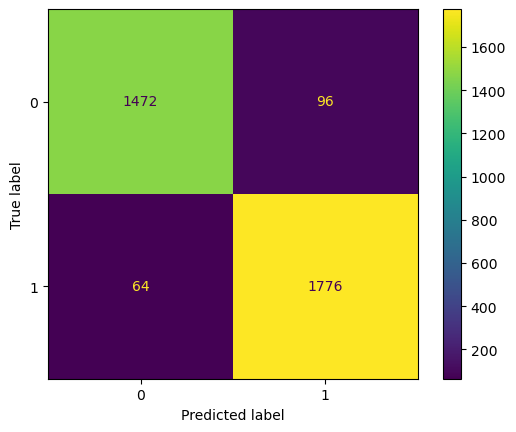

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

# Hyperparameter tuning using Optuna

In [47]:
import optuna
from sklearn.metrics import make_scorer

# Define the objective function to optimize
def objective(trial):
    # RandomForest hyperparameters
    model_name = trial.suggest_categorical('model', ['RandomForest', 'XGBoost'])
    
    if model_name == 'RandomForest':
        # Suggest hyperparameters for RandomForest
        max_depth = trial.suggest_int('max_depth', 10, 20)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        n_estimators = trial.suggest_int('n_estimators', 10, 150, step=10)
        rf = RandomForestClassifier(max_depth=max_depth, max_features=max_features, n_estimators=n_estimators, random_state=42)
        
        # Evaluate RandomForest
        score = cross_val_score(rf, X_res, y_res, scoring='accuracy', cv=3, n_jobs=-1).mean()

    elif model_name == 'XGBoost':
        # Suggest hyperparameters for XGBoost
        max_depth = trial.suggest_int('max_depth', 3, 12)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 6, step=2)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 0.1)
        n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
        
        xgb = XGBClassifier(max_depth=max_depth, min_child_weight=min_child_weight,
                            learning_rate=learning_rate, n_estimators=n_estimators, random_state=42, n_jobs=-1)
        
        # Evaluate XGBoost
        score = cross_val_score(xgb, X_res, y_res, scoring='accuracy', cv=3, n_jobs=-1).mean()

    return score

In [48]:
from sklearn.model_selection import cross_val_score

# Create the Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=100, n_jobs=-1)  # Run 100 trials

# Get the best trial (model and hyperparameters)
best_params = study.best_params
best_model_name = best_params['model']

# Print out the best hyperparameters and score
print(f"Best Model: {best_model_name}")
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)

[I 2025-01-25 20:35:42,984] A new study created in memory with name: no-name-f47a9469-6fb9-4527-b0bb-9f3ce9e0fad2
[I 2025-01-25 20:35:45,018] Trial 2 finished with value: 0.5391794329987674 and parameters: {'model': 'XGBoost', 'max_depth': 7, 'min_child_weight': 1, 'learning_rate': 0.00010170811598270133, 'n_estimators': 50}. Best is trial 2 with value: 0.5391794329987674.
[I 2025-01-25 20:35:46,861] Trial 1 finished with value: 0.8915301989786935 and parameters: {'model': 'XGBoost', 'max_depth': 10, 'min_child_weight': 1, 'learning_rate': 0.009791846627344742, 'n_estimators': 50}. Best is trial 1 with value: 0.8915301989786935.
[I 2025-01-25 20:35:49,524] Trial 4 finished with value: 0.8824910488935845 and parameters: {'model': 'XGBoost', 'max_depth': 8, 'min_child_weight': 5, 'learning_rate': 0.029429262323689552, 'n_estimators': 50}. Best is trial 1 with value: 0.8915301989786935.
[I 2025-01-25 20:35:49,752] Trial 0 finished with value: 0.9396020426131361 and parameters: {'model': '

Best Model: RandomForest
Best Hyperparameters: {'model': 'RandomForest', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 140}
Best Accuracy: 0.9409520455479251


# Result for Optuna
* Best Model: RandomForest
* Best Hyperparameters: {'model': 'RandomForest', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 120}
* Best Accuracy: 0.939719434172683

In [52]:
best_params = {
    'max_depth': 20,
    'max_features': 'log2',
    'n_estimators': 140
}

# Initialize the Random Forest model with the best hyperparameters
model = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

# Validate the accuracy
assert abs(accuracy - 0.9409520455479251) < 0.01, "Accuracy does not match expected value."

Accuracy: 0.94660
